In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [3]:
parks_gdf = gpd.read_file('Data/Riyadh_parks_with_all_variables.geojson')
print("Loaded parks_gdf with columns:", parks_gdf.columns) 

Loaded parks_gdf with columns: Index(['osm_id', 'OBJECTID', 'FEATURE_ANAME', 'MUNICIPALITY', 'DISTRICT',
       'WALKING_TRACK', 'GREEN_AREAS', 'LAYERID', 'LAYERANAME', 'Validation',
       ...
       'PCE_tval_LSI', 'PCE_sig_LSI', 'PCE_coef_building_density',
       'PCE_tval_building_density', 'PCE_sig_building_density',
       'PCE_coef_building_proximity', 'PCE_tval_building_proximity',
       'PCE_sig_building_proximity', 'PCE_localR2_proxy', 'geometry'],
      dtype='object', length=110)


In [4]:
parks_gdf['lst_reduction'].describe()

count    182.000000
mean       0.484710
std        0.827863
min       -1.199007
25%       -0.017010
50%        0.410860
75%        0.797120
max        6.679984
Name: lst_reduction, dtype: float64

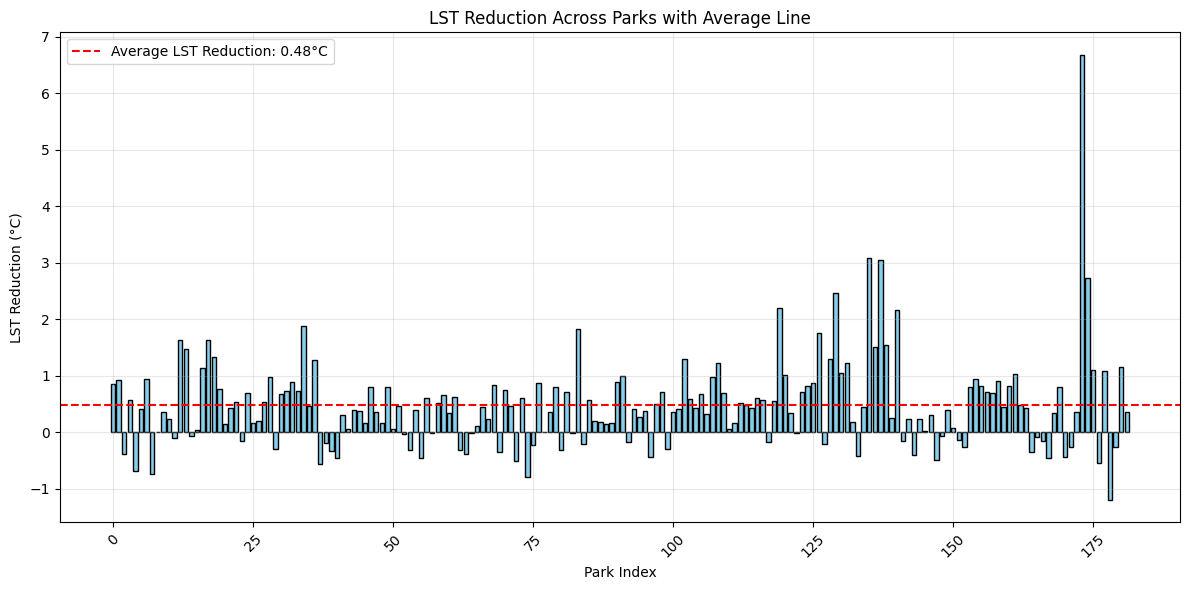

In [5]:

# Calculate the mean LST reduction
mean_lst_reduction = parks_gdf['lst_reduction'].mean()

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(parks_gdf)), parks_gdf['lst_reduction'], color='skyblue', edgecolor='black')
plt.axhline(y=mean_lst_reduction, color='red', linestyle='--', label=f'Average LST Reduction: {mean_lst_reduction:.2f}°C')

# Customize the plot
plt.xlabel('Park Index')
plt.ylabel('LST Reduction (°C)')
plt.title('LST Reduction Across Parks with Average Line')
plt.legend()
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for readability if needed (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [6]:
# Assume parks_relevant_gdf is loaded
mean_coefs = parks_gdf[[col for col in parks_gdf.columns if 'coef' in col and 'lst_reduction' in col]].mean()
mean_tvals = parks_gdf[[col for col in parks_gdf.columns if 'tval' in col and 'lst_reduction' in col]].mean()
significant_factors = {k.split('_coef_')[1]: v for k, v in mean_coefs.items() if abs(mean_tvals[f'lst_reduction_tval_{k.split("_coef_")[1]}']) > 1.96}
print("Most Impactful Factors (Mean Coefficients with Significant t-values):")
print(significant_factors)

Most Impactful Factors (Mean Coefficients with Significant t-values):
{}


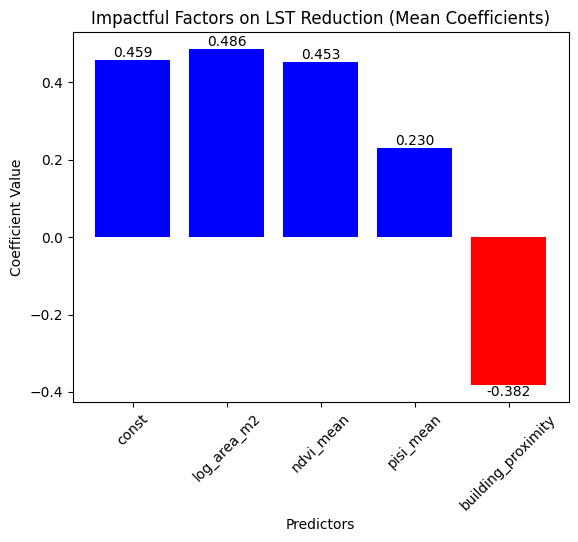

In [7]:
import matplotlib.pyplot as plt
factors = ['const', 'log_area_m2', 'ndvi_mean', 'pisi_mean', 'building_proximity']
coefs = [0.4585, 0.4860, 0.4528, 0.2298, -0.3823]  # From output
plt.bar(factors, coefs, color=['blue' if x > 0 else 'red' for x in coefs])
plt.title('Impactful Factors on LST Reduction (Mean Coefficients)')
plt.xlabel('Predictors')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
for i, v in enumerate(coefs):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom' if v > 0 else 'top')
plt.show()

In [8]:
#avg internal red:
print(f"Average LST Reduction: {parks_gdf['lst_reduction'].mean():.2f}°C")


Average LST Reduction: 0.48°C


In [9]:
# avg external metrics
print(f"Average PCI: {parks_gdf['PCI'].mean():.2f}°C")
print(f"Average PCA: {parks_gdf['PCA'].mean():.0f}m²")
print(f"Average PCE: {parks_gdf['PCE'].mean():.2f}")
print(f"Average PCD: {parks_gdf['PCD'].mean():.2f}")

Average PCI: 0.54°C
Average PCA: 49493m²
Average PCE: 9.42
Average PCD: 207.93


In [10]:
# Calculate percentage of parks with cooling effect
total_parks = len(parks_gdf)
cooling_parks = len(parks_gdf[parks_gdf['PCI'] < 0])
cooling_percentage = (cooling_parks / total_parks) * 100
print(f"Percentage of Parks with Cooling Effect (PCI > 0): {cooling_percentage:.1f}%")
print(f"Number of Cooling Parks: {cooling_parks}, Total Parks: {total_parks}")

Heating_parks = len(parks_gdf[parks_gdf['PCI'] > 0])
Heating_percentage = (Heating_parks / total_parks) * 100
print(f"Percentage of Parks with Heating Effect (PCI > 0): {Heating_percentage:.1f}%")
print(f"Number of Cooling Parks: {Heating_parks}, Total Parks: {total_parks}")

Percentage of Parks with Cooling Effect (PCI > 0): 28.6%
Number of Cooling Parks: 52, Total Parks: 182
Percentage of Parks with Heating Effect (PCI > 0): 71.4%
Number of Cooling Parks: 130, Total Parks: 182
